In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv("cereal.csv")
df

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,G,C,110,2,1,250,0.0,21.0,3,60,25,3,1.0,0.75,39.106174
73,Trix,G,C,110,1,1,140,0.0,13.0,12,25,25,2,1.0,1.00,27.753301
74,Wheat Chex,R,C,100,3,1,230,3.0,17.0,3,115,25,1,1.0,0.67,49.787445
75,Wheaties,G,C,100,3,1,200,3.0,17.0,3,110,25,1,1.0,1.00,51.592193


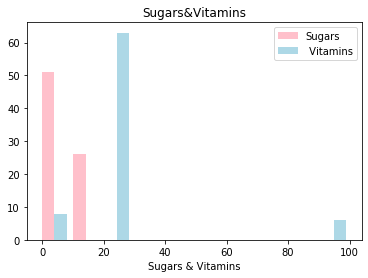

In [20]:
#Question 1
plt.hist([df["sugars"], df["vitamins"]],color=['pink', 'lightblue'])
plt.title("Sugars&Vitamins")
plt.xlabel("Sugars & Vitamins")
plt.legend(["Sugars", " Vitamins"])
plt.show()


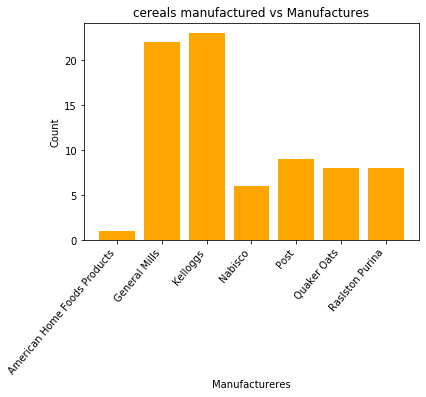

In [21]:
#Question 2
dictionary = {'N': 'Nabisco',
            'Q': 'Quaker Oats',
            'K': 'Kelloggs',
            'R': 'Raslston Purina',
            'G': 'General Mills',
            'P': 'Post',
            'A': 'American Home Foods Products'}

df["manufactures"] = [dictionary[mfr] for mfr in df["mfr"]]

mfr_df = df.groupby(["manufactures"], as_index=False).count()
x = mfr_df["manufactures"]
y = mfr_df["mfr"]

plt.bar(x, y,color="orange")
plt.setp(plt.gca().get_xticklabels(), rotation=50, horizontalalignment='right')
plt.xlabel("Manufactureres")
plt.ylabel("Count")
plt.title("cereals manufactured vs Manufactures")
plt.show()


In [22]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [42]:
#Question 3
x = df.iloc[:, 3:15]
y = df["rating"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=10)
x_train, x_test, y_train, y_test

(    calories  protein  fat  sodium  fiber  carbo  sugars  potass  vitamins  \
 46       160        3    2     150    3.0   17.0      13     160        25   
 60        90        2    0       0    2.0   15.0       6     110        25   
 17       110        1    0      90    1.0   13.0      12      20        25   
 34       120        3    3      75    3.0   13.0       4     100        25   
 43       100        4    1       0    0.0   16.0       3      95        25   
 7        130        3    2     210    2.0   18.0       8     100        25   
 37       110        1    0     180    0.0   14.0      11      35        25   
 67       110        6    0     230    1.0   16.0       3      55        25   
 69       110        2    1     200    0.0   21.0       3      35       100   
 75       100        3    1     200    3.0   17.0       3     110        25   
 76       110        2    1     200    1.0   16.0       8      60        25   
 24       110        2    1     125    1.0   11.0   

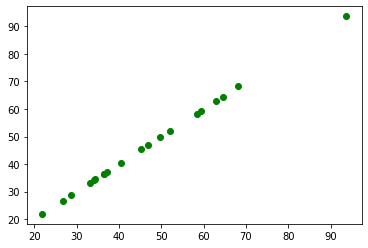

In [41]:
#Question 4
linear = LinearRegression()
linear.fit(x_train, y_train)

prediction = linear.predict(x_test)
plt.scatter(np.array(prediction), np.array(y_test), color= "green")
plt.show()